# Zomato_Mumbai analysis

# Objective 
The goal of this project is to analyze the Zomato Mumbai dataset in order to:

Understand the distribution of restaurant prices, customer votes, ratings, and cuisines.

Identify patterns and relationships between price, cuisine categories, customer engagement (votes), and ratings.

Derive actionable business insights regarding customer preferences, market segmentation (budget vs premium restaurants), and opportunities in niche cuisines.

# Phase 1 : DATA CLEANING

# Importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
df = pd.read_csv(
    "C:\prac python\Zomato_Mumbai_Dataset.csv",
    sep="|",
    engine="python",
    quotechar='"',
    on_bad_lines="skip"  # or "warn"
)
df.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


# Basic understanding 

In [3]:
df.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15079,15078,15077,15078,15078,15078,15078,15078,15013,14068,15078,15078
unique,12718,67,3183,2,241,13821,944,23,2551,31,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14136,942,942,942,5262,1192,5112,2360,2360


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15079 entries, 0 to 15078
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15079 non-null  object
 1   PRICE            15078 non-null  object
 2   CUSINE_CATEGORY  15077 non-null  object
 3   CITY             15078 non-null  object
 4   REGION           15078 non-null  object
 5   URL              15078 non-null  object
 6   PAGE NO          15078 non-null  object
 7   CUSINE TYPE      15078 non-null  object
 8   TIMING           15013 non-null  object
 9   RATING_TYPE      14068 non-null  object
 10  RATING           15078 non-null  object
 11  VOTES            15078 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [5]:
df.shape

(15079, 12)

In [6]:
df.columns

Index(['NAME', 'PRICE', 'CUSINE_CATEGORY', 'CITY', 'REGION', 'URL', 'PAGE NO',
       'CUSINE TYPE', 'TIMING', 'RATING_TYPE', 'RATING', 'VOTES'],
      dtype='object')

# Rename the column

In [7]:
df.columns=df.columns.str.strip().str.lower()

# Handling and removing the duplicate values

In [8]:
df.duplicated().sum()      # To detect

941

In [9]:
df=df.drop_duplicates()    # To handle

# Handling null values 

In [10]:
df.isnull().sum()  # To detect

name                  0
price                 1
cusine_category       2
city                  1
region                1
url                   1
page no               1
cusine type           1
timing               66
rating_type        1011
rating                1
votes                 1
dtype: int64

# Step 1 : To remove the unwanted columns

In [11]:
columns_to_drop=['url','page no','timing']
df=df.drop(columns=columns_to_drop,axis=1)

In [12]:
df.head(2)

,name,price,cusine_category,city,region,cusine type,rating_type,rating,votes
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,Casual Dining,Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,Dessert Parlor,Very Good,4.4,1723


# Step 2 : Handling each column dtype and filling the missing value

In [13]:
df['name'].unique()

array(['Hitchki', 'Baba Falooda', 'Chin Chin Chu', ..., 'Uncha Otlawala',
       'Mandarin Panda', '\x1a'], dtype=object)

In [14]:
df = df[~df["name"].isin(["NAME", "\x1a"])]

In [15]:
unique_names = df["name"].dropna().unique()
len(unique_names), unique_names[:20]

(12716,
 array(['Hitchki', 'Baba Falooda', 'Chin Chin Chu', 'Butterfly High',
        'BKC  DIVE', 'Flea Bazaar Café', 'Persian Darbar', 'Tanatan',
        'Cafe Safar', 'Plum by Bent Chair', 'Angrezi Dhaba', 'Raasta',
        'Todi Mill Social', 'Burn - Bar & Kitchen', '145 Bandra',
        'Cafe Zoe', 'Ustaadi', 'Cafe Maaz', "Carter's Blue", 'Rajasthan'],
       dtype=object))

In [16]:
# Now changing the data type 
df['name']=df['name'].astype('category')

In [17]:
df['price'].unique()

array(['1200', '400', '1800', '1000', '800', '1300', '1500', '600',
       '1400', '1100', '2000', '350', '900', '700', '500', '1600', '150',
       '300', '550', '450', '650', '750', '250', '200', '850', '100',
       '2500', '1450', '180', '950', '1700', '1900', '2600', '2400',
       '3000', '1250', '3200', '505', '2200', '1050', '1650', '1350',
       '50', '920', '1150', '1550', '3500', '398', '5000', '120', '220',
       '160', '340', '5', '480', '2100', '580', '1850', '249', '80',
       '2300', '0', '360', '3502', '248', '2700'], dtype=object)

In [18]:
# replacing the value zero to nan
df["price"] = df["price"].replace(0, np.nan)

In [19]:
# changing the data type
df['price']=df['price'].astype('int')

In [20]:
# Filing the missing value 
df['price'].fillna(df['price'].median(),inplace=True)

In [21]:
df['cusine_category'].unique()

array(['Modern Indian,North Indian,Chinese,Momos,Biryani,Continental,American,Fast Food',
       'Desserts,Ice Cream,Beverages', 'Asian,Chinese', ...,
       'Fast Food,Juices,Street Food',
       'Continental,Italian,Seafood,North Indian,Cafe',
       'Desserts,Chinese,Thai'], dtype=object)

In [22]:
# Dropping the missing column 
df = df.dropna(subset=["cusine_category"])

In [23]:
# Changing the data types
df['cusine_category']=df['cusine_category'].astype('category')

In [24]:
# Changing the data type for city , region , cuisine type
df['city']=df['city'].astype('category')
df['region']=df['region'].astype('category')
df['cusine type']=df['cusine type'].astype('category')

In [25]:
# Column rating_type

In [26]:
df['rating_type'].unique()

array(['Excellent', 'Very Good', 'Veľmi dobré', 'Good', 'Velmi dobré',
       'Not rated', nan, 'Average', 'Excelente', 'Muito Bom', 'Poor',
       'Skvělá volba', 'Çok iyi', 'Baik', 'Bardzo dobrze', 'Bom', 'Média',
       'Dobrze', 'Buono', 'İyi', 'Bueno', 'Ortalama', 'Skvělé', 'Biasa',
       'Průměr', 'Sangat Baik', 'Priemer', 'Dobré', 'Promedio',
       'Muy Bueno', 'Media'], dtype=object)

In [27]:
# Removing the invalid enteries
remap_ratingtype={
    'Veľmi dobré':'Very Good',
    'RATING_TYPE':'Not Rated',
    ' ...':'Not Rated',
    'Priemer':'Average',
    'Dobré':'Good',
    'Promedio':'Average',
    'Muy Bueno':'Very Good',
    'Media':'Average',
    'Baik':'Good',
    'Bardzo dobrze':'Very Good',
    'Biasa':'Average',
    '...':'Not Rated',
    'Velmi dobré':'Very Good',
    'Çok iyi':'Very Good',
    'İyi':'Good',
    'Bueno':'Good',
    'Ortalama':'Average',
    'Skvělé':'Excellent',
    'Průměr':'Average',
    'Sangat Baik':'Very Good',
    'Bom':'Good',
    'Bueno':'Good',
    'Buono':'Good',
    'Muito Bom':'Very Good',
    'Skvělá volba':'Excellent',
    'Média':'Average',
    'Dobrze':'Good',
    'Dobrze':'Good',
    'Excelente':'Excellent',
    'Not rated':'Not Rated',
    'Skvělá volba':'Excellent',
    'nan':'Not Rated'
}
df['rating_type']=df['rating_type'].replace(remap_ratingtype)

In [28]:
# To check
df['rating_type'].unique()

array(['Excellent', 'Very Good', 'Good', 'Not Rated', nan, 'Average',
       'Poor'], dtype=object)

In [29]:
df["rating_type"] = df["rating_type"].fillna("Not Rated")

In [30]:
df["rating_type"] = df["rating_type"].astype('category')

In [31]:
# Rating column

In [32]:
rating_map={'RATING':np.nan,'NEW':np.nan,'-':np.nan,'Opening':np.nan}
df['rating']=df['rating'].replace(rating_map)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [33]:
# Vote column

In [34]:
rating_map={'VOTES':np.nan}
df['votes']=df['votes'].replace(rating_map)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').astype('Float64')

# Clean string and text columns

In [35]:
for col in df.select_dtypes(include='category').columns: 
    df[col] = df[col].str.strip().str.lower()

# Detecting outliers

In [36]:
def detect_outlier(df):
    num_col=df.select_dtypes(include=['int64','float64'])
    outlier_summary={}
    for col in num_col:
        Q1,Q3=df[col].quantile([0.25,0.75])
        IQR=Q3-Q1
        lower,upper=Q1-1.5*IQR ,Q3+1.5*IQR
        outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
        outlier_summary[col] = outlier_count
        print(f"{col}: {outlier_count} outliers")
    return outlier_summary
outlier_count = detect_outlier(df)
        

rating: 144 outliers
votes: 1340 outliers


In [37]:
# Capping
outlier_col=[
    'rating',
    'votes'
]

for col in outlier_col:
    Q1,Q3=df[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    lower,upper=Q1-1.5*IQR ,Q3+1.5*IQR
    # Capping values
    df[col]=df[col].clip(lower,upper)

In [38]:
# To check 
outlier_count = detect_outlier(df)

rating: 0 outliers
votes: 0 outliers


# Saved clean data 

In [39]:
df.to_csv('C:\prac python\zomato_mumbai_clean_data.csv', index=False)

# Phase 2 : EXPLORATORY DATA ANALYSIS (EDA)

In [40]:
df.head()

,name,price,cusine_category,city,region,cusine type,rating_type,rating,votes
0,hitchki,1200,"modern indian,north indian,chinese,momos,birya...",mumbai,first international financial centre-- bandra ...,casual dining,excellent,4.45,345.0
1,baba falooda,400,"desserts,ice cream,beverages",mumbai,mahim,dessert parlor,very good,4.40,345.0
2,chin chin chu,1800,"asian,chinese",mumbai,juhu,casual dining,very good,4.20,337.0
3,butterfly high,1000,modern indian,mumbai,bandra kurla complex,bar,very good,4.30,345.0
4,bkc dive,1200,"north indian,chinese,continental",mumbai,bandra kurla complex,bar,very good,4.40,345.0


# Univariate analysis

# Price column 

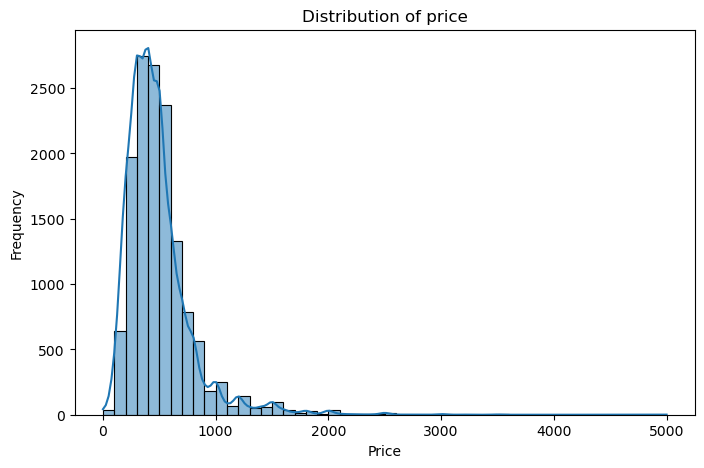

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'],bins=50,kde=True)
plt.title("Distribution of price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Observations – Price Column

The distribution of prices is highly right-skewed.

Most restaurants fall in the lower price range.

A majority of prices are below ₹1000, with a sharp peak between ₹200–₹600.

A few extreme values (up to ₹5000) indicate outliers or premium restaurants.

# Cuisine category column

In [42]:
# Count frequency of each cuisine
cuisine_counts = df["cusine_category"].value_counts()

In [43]:
cuisine_counts

cusine_category
north indian,chinese                              841
chinese                                           830
fast food                                         698
north indian                                      546
chinese,north indian                              433
                                                 ... 
fast food,italian,pizza,chinese,street food         1
fast food,continental,italian,mexican               1
cafe,fast food,beverages,chinese,italian,pizza      1
north indian,mangalorean,malwani,chinese            1
desserts,chinese,thai                               1
Name: count, Length: 3182, dtype: int64

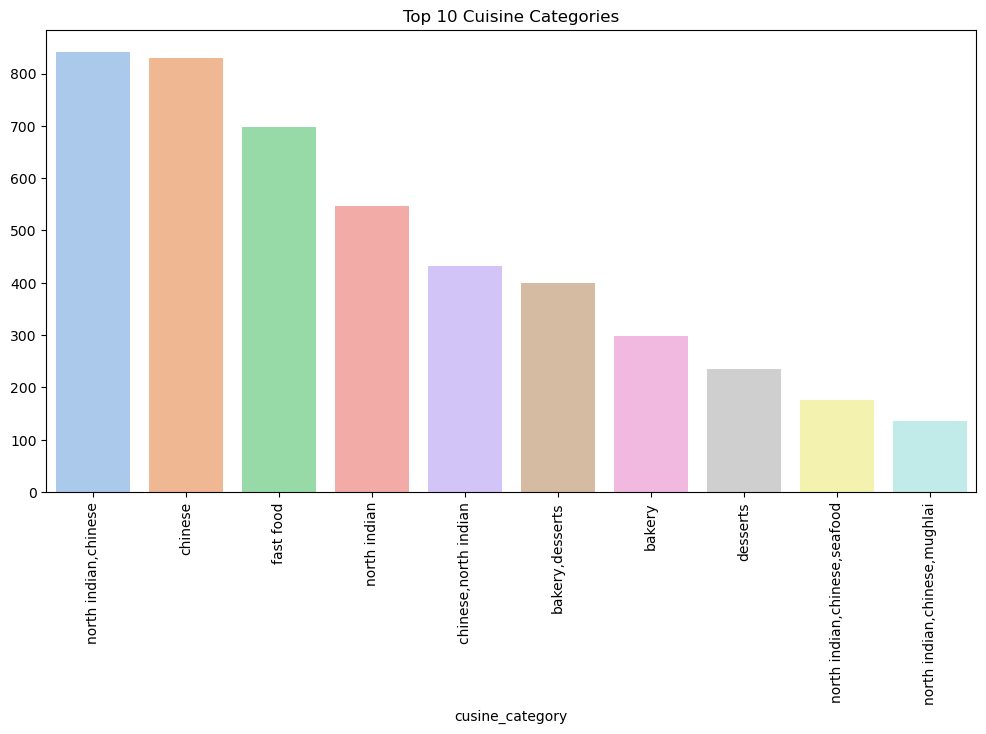

In [44]:
plt.figure(figsize=(12,6))
sns.barplot(x=cuisine_counts.index[:10], y=cuisine_counts.values[:10], palette="pastel")
plt.xticks(rotation=90)
plt.title("Top 10 Cuisine Categories")
plt.show()

# Observations – Cuisine Categories

Indian & Chinese cuisines dominate the restaurant scene in Mumbai.

Indian-Chinese fusion and Chinese alone are the top two most popular categories (800+ restaurants each).

Fast Food and North Indian are also highly popular, with 500–700 restaurants.

Bakery & Desserts have a significant presence, showing a strong demand for sweet and snack-based outlets.

Cuisines like Seafood and Mughlai have relatively fewer restaurants, indicating more niche or regional demand.

The distribution highlights that the food market in Mumbai is dominated by comfort and quick-serve cuisines (Chinese, Fast Food, Indian), while specialized cuisines have smaller market share.

# Rating_type column 

In [45]:
rating_counts = df["rating_type"].value_counts()
print(rating_counts)

rating_type
average      5123
good         4343
not rated    3370
very good    1151
excellent     101
poor           47
Name: count, dtype: int64


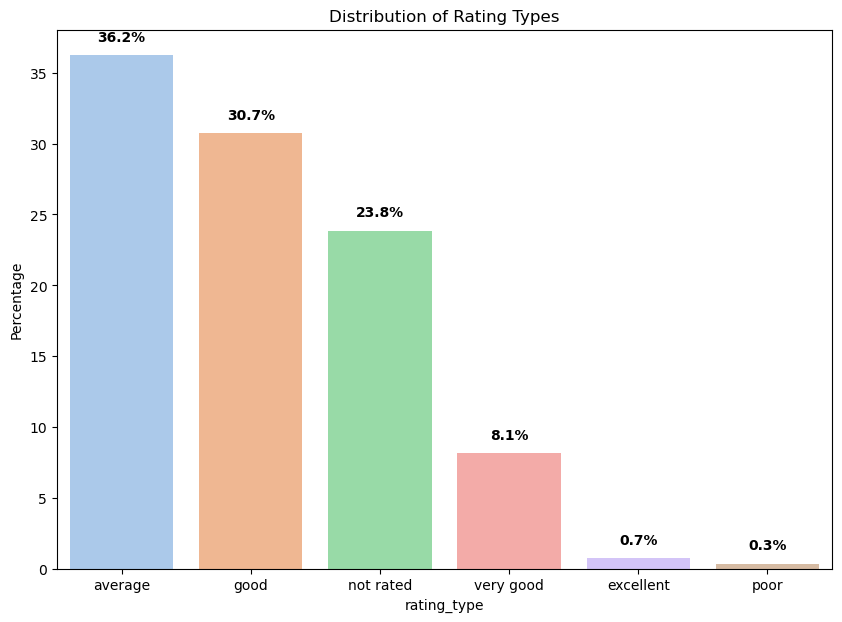

In [46]:
# Get value counts as percentage
rating_counts = df["rating_type"].value_counts(normalize=True) * 100

plt.figure(figsize=(10,7))
ax = sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="pastel")  

# Add percentages on top of bars
for i, v in enumerate(rating_counts.values):
    ax.text(i, v + 1, f"{v:.1f}%", ha="center", fontweight="bold")

plt.ylabel("Percentage")
plt.title("Distribution of Rating Types")
plt.show()

# Observations – Rating Type

The majority of restaurants are rated "Average" (36.2%) → suggesting that most establishments provide a satisfactory but not outstanding experience.

A large share is "Good" (30.7%), showing many restaurants manage to maintain decent service and food quality.

"Not Rated" (23.8%) is also significant → this could indicate either newly listed restaurants or those with insufficient customer feedback.

Only 8.1% of restaurants are "Very Good", showing that only a small fraction consistently exceed customer expectations.

Extremely few restaurants fall into "Excellent" (0.3%) or "Poor" (0.7%), which implies:

Customers rarely give extreme ratings, OR

Zomato tends to list restaurants in the mid-quality range

# Bivariate Analysis

# 1. Price vs Cuisine Category

Goal: See which cuisines are generally more expensive or budget-friendly.

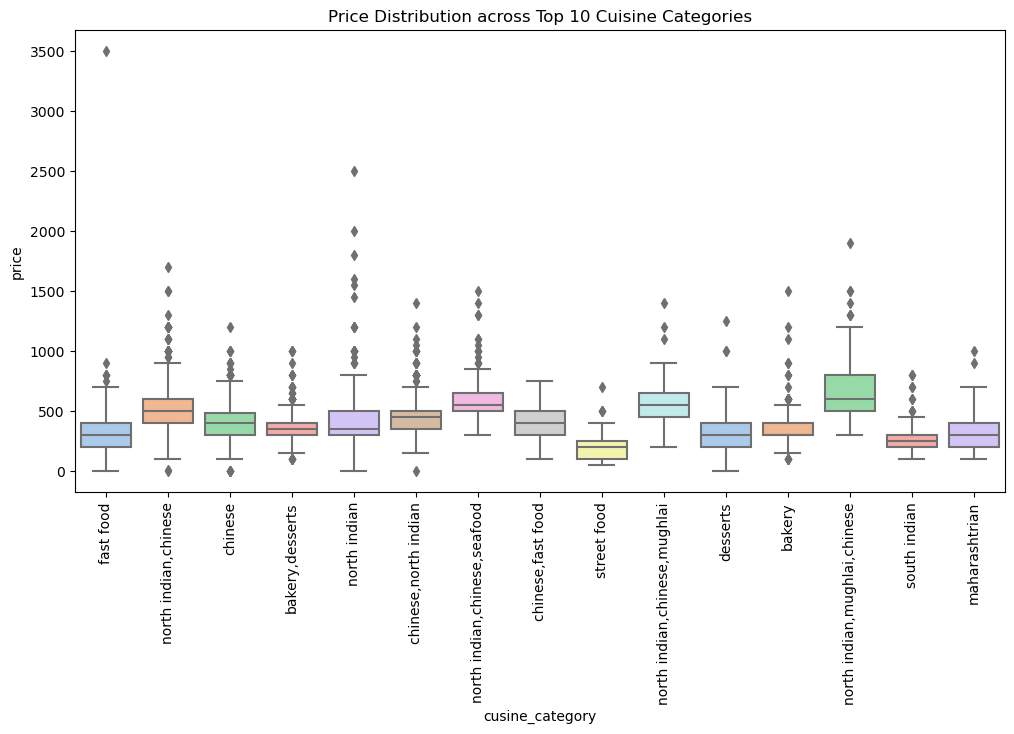

In [47]:
top_cuisines = df["cusine_category"].value_counts().head(15).index
df_top = df[df["cusine_category"].isin(top_cuisines)]

plt.figure(figsize=(12,6))
sns.boxplot(x="cusine_category", y="price", data=df_top, palette="pastel")
plt.xticks(rotation=90)
plt.title("Price Distribution across Top 10 Cuisine Categories")
plt.show()


# Observations – Price vs Cuisine Category 

Fast Food and Street Food → have the lowest median prices, making them the most budget-friendly options (typically < ₹300–400).

North Indian, Chinese, Bakery/Desserts → fall in the mid-price range (₹400–600), showing they are moderately priced and widely available.

Multi-cuisine categories (e.g., North Indian + Chinese, Chinese + Seafood, Mughlai mixes) → generally have higher median prices, indicating they are positioned towards premium dining.

The spread of prices (IQR) is wider in multi-cuisine categories compared to single cuisines, meaning customers pay more variability depending on the restaurant type.

With outliers removed, the data looks more balanced and representative of the mainstream restaurant market, without being pulled by extreme luxury restaurants.

# 2. Name vs rating_type

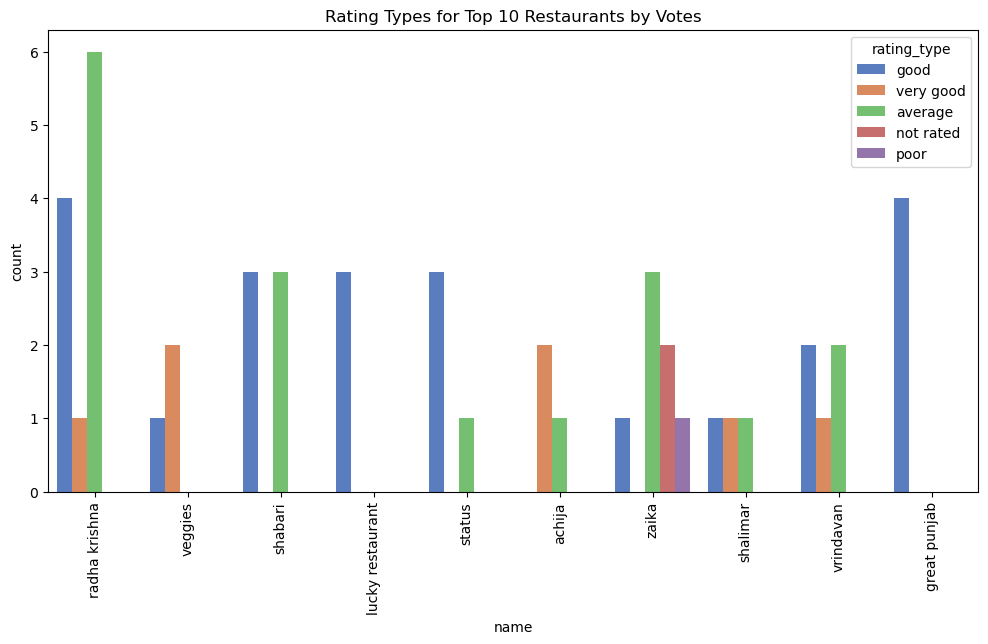

In [48]:
top_names = df.groupby("name")["votes"].sum().nlargest(10).index
df_top = df[df["name"].isin(top_names)]

plt.figure(figsize=(12,6))
sns.countplot(x="name", hue="rating_type", data=df_top, palette="muted")
plt.xticks(rotation=90)
plt.title("Rating Types for Top 10 Restaurants by Votes")
plt.show()


# Observation
Shows which top restaurants are rated “Very Good” or “Excellent”.

Helps identify if popularity aligns with high ratings.

# 3) Cuisine Category vs Rating
Goal: See how customer satisfaction varies by cuisine.

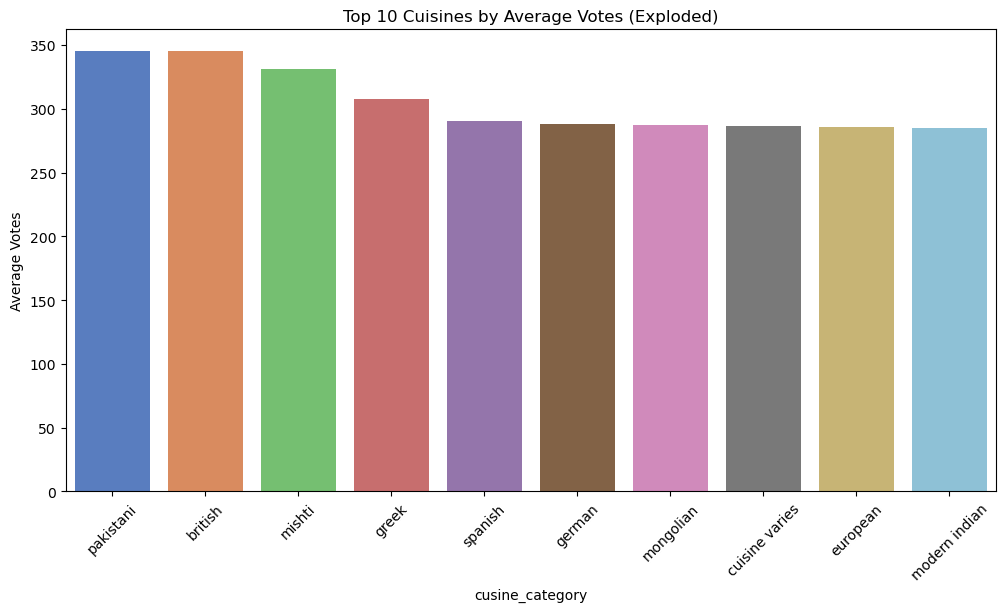

In [49]:
# Split cuisines into separate rows
df_exploded = df.assign(cusine_category=df["cusine_category"].str.split(",")).explode("cusine_category")

# Clean whitespace
df_exploded["cusine_category"] = df_exploded["cusine_category"].str.strip()

# Now group by single cuisines
cuisine_votes = (
    df_exploded.groupby("cusine_category")["votes"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))
sns.barplot(x=cuisine_votes.index, y=cuisine_votes.values, palette="muted")
plt.xticks(rotation=45)
plt.ylabel("Average Votes")
plt.title("Top 10 Cuisines by Average Votes (Exploded)")
plt.show()


# Observations :
Niche and international cuisines (Pakistani, British, Greek, Mishti) are surprisingly high on engagement.

Mumbai customers show interest not only in mainstream Indian cuisines but also in global and experimental food options.

This insight could help restaurants in Mumbai position themselves by offering unique cuisine mixes.

# Multi variate analysis

# 1) Price vs Cuisine vs Rating Type

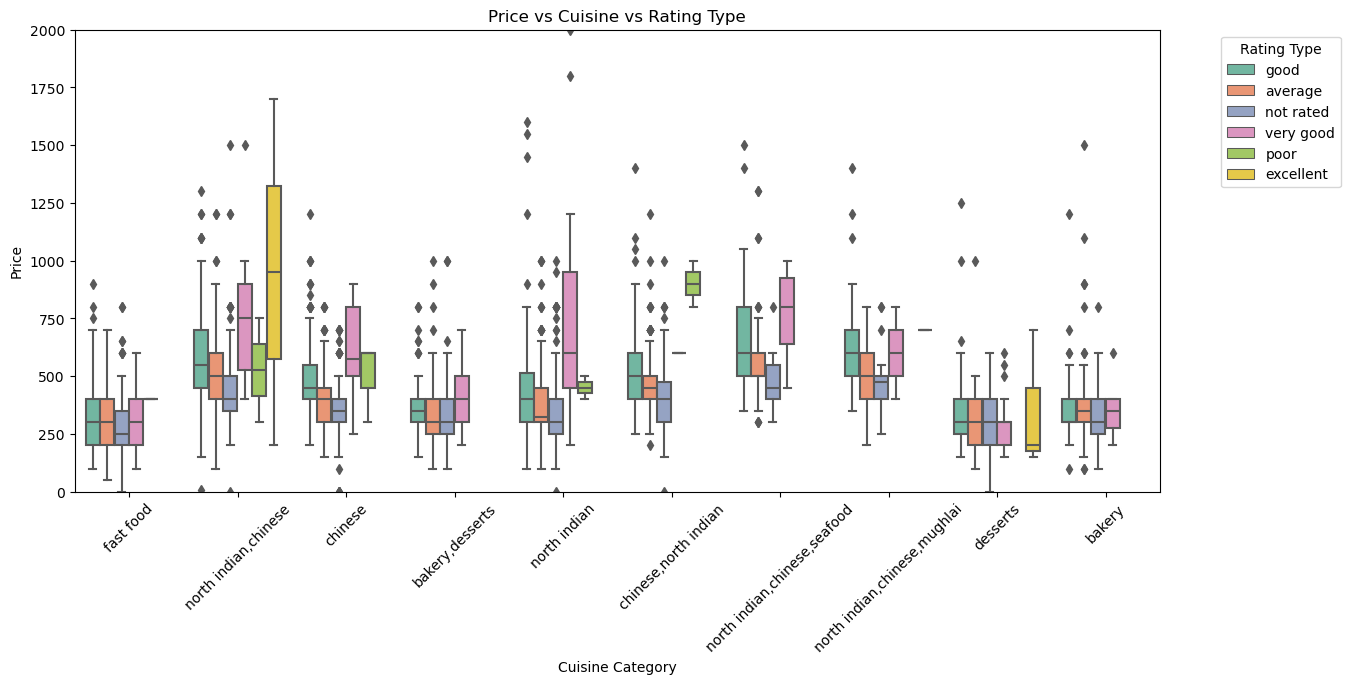

In [50]:
# Focus on top cuisines to avoid overcrowding
top_cuisines = df["cusine_category"].value_counts().head(10).index
df_top = df[df["cusine_category"].isin(top_cuisines)]

plt.figure(figsize=(14,6))
sns.boxplot(
    x="cusine_category", 
    y="price", 
    hue="rating_type", 
    data=df_top, 
    palette="Set2"
)

plt.xticks(rotation=45)
plt.ylim(0, 2000)   # optional: zoom in if prices are too spread
plt.title("Price vs Cuisine vs Rating Type")
plt.ylabel("Price")
plt.xlabel("Cuisine Category")
plt.legend(title="Rating Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Observations :
Budget cuisines (Street Food, Fast Food) stay affordable regardless of ratings.

Premium cuisines (Continental, Italian, Mughlai blends) are more expensive, and their higher-rated restaurants skew towards the upper price range.

Customer ratings are not only based on price → mid-priced restaurants also perform well in terms of ratings.

# 2) Votes vs Price vs Cuisine

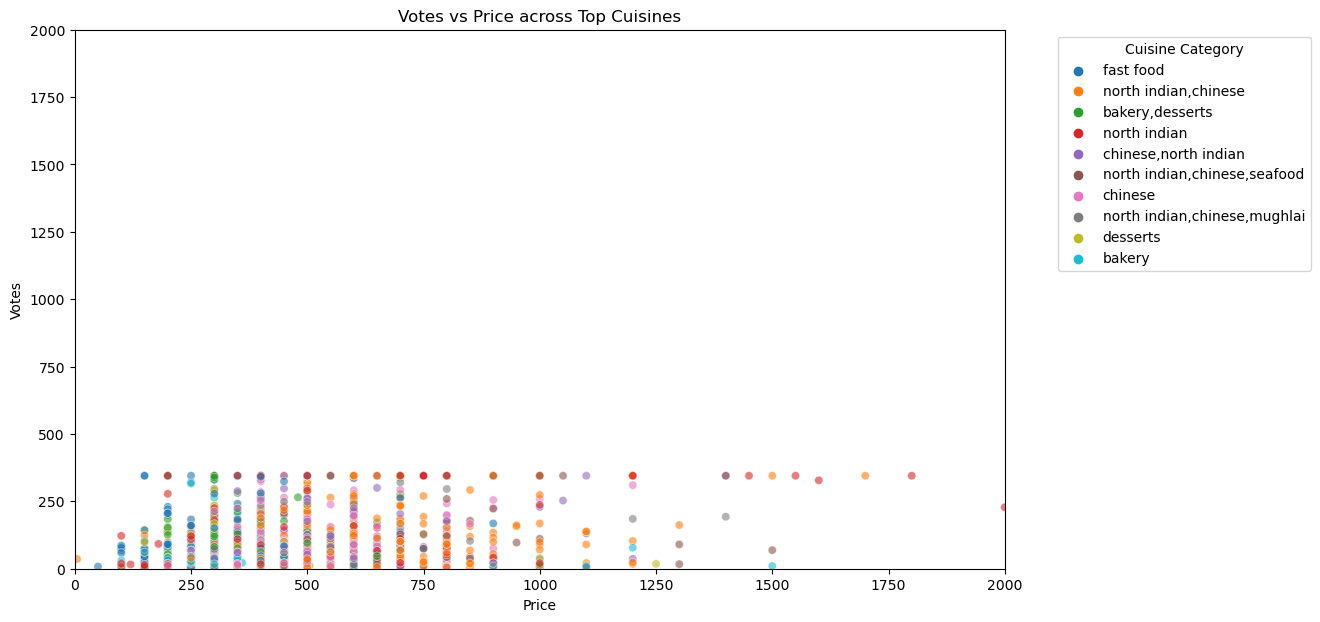

In [51]:
# Drop rows with NaN in price or votes
df_top = df[df["cusine_category"].isin(top_cuisines)].dropna(subset=["price", "votes"])

plt.figure(figsize=(12,7))
sns.scatterplot(
    x="price", 
    y="votes", 
    hue="cusine_category", 
    data=df_top, 
    alpha=0.6
)

plt.xlim(0, 2000)   # adjust if needed
plt.ylim(0, 2000)
plt.title("Votes vs Price across Top Cuisines")
plt.xlabel("Price")
plt.ylabel("Votes")
plt.legend(title="Cuisine Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


# Observation 
Most restaurants are clustered in the low-price range (₹200–₹800) → showing that Mumbai’s food scene is dominated by affordable/mid-range restaurants.

Votes do not increase linearly with price → some low and mid-priced restaurants receive as many votes as higher-priced ones.

High-vote restaurants exist across cuisines:

North Indian, Chinese cuisines dominate across both budget and premium ranges.

Bakery/Desserts show moderate votes but are less spread in price.

Fast Food consistently stays low-priced but still attracts votes, reflecting mass appeal.

Premium restaurants (₹1000+) are fewer but still receive steady votes, showing demand for fine dining, though not as high as affordable outlets.

The distribution is right-skewed on both axes → only a few restaurants achieve very high votes or very high prices, while the majority cluster around the lower values.

# Business Insights

# 1) Price Distribution

In [52]:
# % of restaurants below 1000
below_1000 = (df["price"] < 1000).mean() * 100

# Median and mean
median_price = df["price"].median()
mean_price = df["price"].mean()

# % of restaurants in premium segment (2000+)
premium = (df["price"] >= 2000).mean() * 100

below_1000, median_price, mean_price, premium


(94.0926777502653, 400.0, 480.98599221789885, 0.5164485320127343)

# 2) Cuisine Preferences

In [53]:
# % share of top cuisines
cuisine_counts = df_exploded["cusine_category"].value_counts(normalize=True) * 100

# Top 10 cuisines
top_cuisines = cuisine_counts.head(10)

cuisine_counts.sum(), top_cuisines


(100.00000000000004,
 cusine_category
 chinese         19.184330
 north indian    18.798421
 fast food       10.533548
 south indian     4.619208
 desserts         4.312235
 mughlai          3.897091
 seafood          3.566730
 beverages        2.996638
 bakery           2.938167
 street food      2.517176
 Name: proportion, dtype: float64)

# 3) Customer Engagement (Votes)

In [54]:
# Median and average votes
median_votes = df["votes"].median()
mean_votes = df["votes"].mean()

# % restaurants with 500+ votes
popular_restaurants = (df["votes"] >= 500).mean() * 100

median_votes, mean_votes, popular_restaurants


(44.0, 100.82220157919183, 0.0)